# Testing the Locative vs. Durative Division in Time Adverbials

Hypothesis: Locative and durative time adverbials constitute two distinct categories of time adverbials which function and behave differently in the clause.

In [2]:
import json
from tf.app import use
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_rows', 200)
idx = pd.IndexSlice
from adjustText import adjust_text
from bidi.algorithm import get_display

# custom modules
from scripts.paths import paths
from scripts.export import Exporter
import scripts.nav_tree as nt

# saving paths
out = Exporter(paths['outdir'], 'time_LABELTESTING')

with open(paths['phrase_data'], 'r') as infile:
    phrase_parses = json.load(infile)
with open(paths['time_data'], 'r') as infile:
    time_parses = json.load(infile)

# load BHSA data
bhsa = use('bhsa', silent='deep')
F, E, T, L = bhsa.api.F, bhsa.api.E, bhsa.api.T, bhsa.api.L

In [3]:
df = pd.read_csv(paths['dataset'], index_col='node')
df_sg = df.query("(n_times == 1) and (is_advb == False)")

print(df.shape)
print(df_sg.shape)

(3648, 17)
(2575, 17)


In [4]:
df.head()

,book,verse,function,quality,name,text,time_lexs,n_times,lex_token,is_advb,cl_kind,clause,sentence,verb,verbform,verb_etcbc,verb_txt
node,,,,,,,,,,,,,,,,,
427553,Genesis,Genesis 1:1,simultaneous,location,simultaneous,בְּרֵאשִׁ֖ית,R>CJT/,1,ב.ז׳,False,VC,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,3.0,qtl,BR>[,ברא
427680,Genesis,Genesis 2:2,simultaneous,location,simultaneous,בַּיֹּ֣ום שְּׁבִיעִ֔י,JWM/,1,ב.ה.ז׳.ס׳,False,VC,וַיְכַ֤ל אֱלֹהִים֙ בַּיֹּ֣ום הַשְּׁבִיעִ֔י מְל...,וַיְכַ֤ל אֱלֹהִים֙ בַּיֹּ֣ום הַשְּׁבִיעִ֔י מְל...,685.0,wayq,KLH[,כלה
427682,Genesis,Genesis 2:2,simultaneous,location,simultaneous,בַּיֹּ֣ום שְּׁבִיעִ֔י,JWM/,1,ב.ה.ז׳.ס׳,False,VC,וַיִּשְׁבֹּת֙ בַּיֹּ֣ום הַשְּׁבִיעִ֔י מִכָּל־מ...,וַיִּשְׁבֹּת֙ בַּיֹּ֣ום הַשְּׁבִיעִ֔י מִכָּל־מ...,696.0,wayq,CBT[,שׁבת
427693,Genesis,Genesis 2:5,anterior,sequence,anterior,טֶ֚רֶם,VRM/,1,טרם,True,VC,וְכֹ֣ל׀ שִׂ֣יחַ הַשָּׂדֶ֗ה טֶ֚רֶם יִֽהְיֶ֣ה בָ...,וְכֹ֣ל׀ שִׂ֣יחַ הַשָּׂדֶ֗ה טֶ֚רֶם יִֽהְיֶ֣ה בָ...,751.0,yqtl,HJH[,היה
427694,Genesis,Genesis 2:5,anterior,sequence,anterior,טֶ֣רֶם,VRM/,1,טרם,True,VC,וְכָל־עֵ֥שֶׂב הַשָּׂדֶ֖ה טֶ֣רֶם יִצְמָ֑ח,וְכָל־עֵ֥שֶׂב הַשָּׂדֶ֖ה טֶ֣רֶם יִצְמָ֑ח,761.0,yqtl,YMX[,צמח


In [5]:
df_sg.head()

,book,verse,function,quality,name,text,time_lexs,n_times,lex_token,is_advb,cl_kind,clause,sentence,verb,verbform,verb_etcbc,verb_txt
node,,,,,,,,,,,,,,,,,
427553,Genesis,Genesis 1:1,simultaneous,location,simultaneous,בְּרֵאשִׁ֖ית,R>CJT/,1,ב.ז׳,False,VC,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,3.0,qtl,BR>[,ברא
427680,Genesis,Genesis 2:2,simultaneous,location,simultaneous,בַּיֹּ֣ום שְּׁבִיעִ֔י,JWM/,1,ב.ה.ז׳.ס׳,False,VC,וַיְכַ֤ל אֱלֹהִים֙ בַּיֹּ֣ום הַשְּׁבִיעִ֔י מְל...,וַיְכַ֤ל אֱלֹהִים֙ בַּיֹּ֣ום הַשְּׁבִיעִ֔י מְל...,685.0,wayq,KLH[,כלה
427682,Genesis,Genesis 2:2,simultaneous,location,simultaneous,בַּיֹּ֣ום שְּׁבִיעִ֔י,JWM/,1,ב.ה.ז׳.ס׳,False,VC,וַיִּשְׁבֹּת֙ בַּיֹּ֣ום הַשְּׁבִיעִ֔י מִכָּל־מ...,וַיִּשְׁבֹּת֙ בַּיֹּ֣ום הַשְּׁבִיעִ֔י מִכָּל־מ...,696.0,wayq,CBT[,שׁבת
427805,Genesis,Genesis 3:8,simultaneous,location,simultaneous,לְר֣וּחַ הַיֹּ֑ום,RWX/,1,ל.ז׳,False,VC,מִתְהַלֵּ֥ךְ בַּגָּ֖ן לְר֣וּחַ הַיֹּ֑ום,וַֽיִּשְׁמְע֞וּ אֶת־קֹ֨ול יְהוָ֧ה אֱלֹהִ֛ים מִ...,1321.0,ptcp,HLK[,הלך
427835,Genesis,Genesis 3:14,atelic_ext,duration,atelic_ext,כָּל־יְמֵ֥י חַיֶּֽיךָ׃,JWM/,1,ז׳,False,VC,וְעָפָ֥ר תֹּאכַ֖ל כָּל־יְמֵ֥י חַיֶּֽיךָ׃,וְעָפָ֥ר תֹּאכַ֖ל כָּל־יְמֵ֥י חַיֶּֽיךָ׃,1452.0,yqtl,>KL[,אכל


## Examining Lex Tokens

In [6]:
df_sg.lex_token.unique().shape

(70,)

In [7]:
T.text(651542)

'בְּרֵאשִׁ֖ית '

In [8]:
token_ct_raw = pd.DataFrame(df_sg.lex_token.value_counts())

token_ct_raw.head()

,lex_token
ה.ז׳,319
מ׳.ז׳,281
ב.ז׳,263
ב.ה.ז׳.הוא,221
ל.ז׳,205


Tokens >= 5 occurrences:

In [9]:
token_ct = token_ct_raw[token_ct_raw.lex_token >= 5]

print(token_ct.shape)

token_ct

(28, 1)


,lex_token
ה.ז׳,319
מ׳.ז׳,281
ב.ז׳,263
ב.ה.ז׳.הוא,221
ל.ז׳,205
ב.ה.ז׳,195
ז׳,153
ב.ה.ז׳.ס׳,146
עד.ז׳,139
ב.מ׳.ז׳,82


## Verb Lexeme

In [10]:
verb_ct = pd.pivot_table(
    df_sg[df_sg.lex_token.isin(token_ct.index)],
    index=['lex_token', 'quality'],
    columns=['verb_txt'],
    aggfunc='size',
    fill_value=0
)

verb_ct = verb_ct.loc[idx[:, ['location', 'duration']], :]

verb_ct

,verb_txt,אבד,אבל,אגר,אהב,אוה,אור,אחר,אכל,אמן,אמץ,...,שׂוג,שׂחה,שׂחק,שׂים,שׂמח,שׂרר,תלה,תמם,תקע,תקף
lex_token,quality,,,,,,,,,,,,,,,,,,,,,
ב.ה.ז׳,location,0,0,2,0,1,0,1,5,0,0,...,0,0,0,0,0,0,0,0,1,0
ב.ה.ז׳.הוא,location,1,0,0,0,0,0,0,3,0,0,...,0,0,0,2,0,0,0,0,0,0
ב.ה.ז׳.היא,location,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ב.ה.ז׳.הם,location,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ב.ה.ז׳.המה,location,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ב.ה.ז׳.זה,location,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ב.ה.ז׳.ס׳,location,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
ב.ז׳,location,2,0,0,0,0,0,0,3,0,0,...,1,0,0,0,0,0,0,0,0,0
ב.מ׳.ז׳,location,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Prune 

In [11]:
# drop verbs that only occur once
verb_ct_ = verb_ct.drop(
        columns=verb_ct.columns[verb_ct.sum() < 10]
    )

# re-filter rare tokens
verb_ct_ = verb_ct_.drop(
    index=verb_ct_.index[verb_ct_.sum(1) < 2]
)

In [12]:
verb_ct_.shape

(26, 39)

In [13]:
verb_ct_

,verb_txt,אכל,אמר,בוא,דבר,היה,הלך,זכר,חיה,חלל,טמא,...,קרא,קרב,ראה,שׁוב,שׁכב,שׁכם,שׁלח,שׁמר,שׁפט,שׂים
lex_token,quality,,,,,,,,,,,,,,,,,,,,,
ב.ה.ז׳,location,5,4,13,2,30,1,2,0,0,0,...,2,1,1,2,2,29,1,1,0,0
ב.ה.ז׳.הוא,location,3,7,7,2,56,2,0,0,0,1,...,4,1,4,2,0,0,0,0,0,2
ב.ה.ז׳.היא,location,1,5,2,1,5,1,0,0,0,0,...,1,0,0,3,0,0,3,0,1,0
ב.ה.ז׳.הם,location,0,1,0,0,7,0,0,0,2,0,...,0,0,1,0,0,0,0,0,0,0
ב.ה.ז׳.המה,location,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
ב.ה.ז׳.זה,location,1,0,1,1,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ב.ה.ז׳.ס׳,location,4,4,10,0,34,0,0,0,1,0,...,1,4,6,3,0,0,3,0,0,0
ב.ז׳,location,3,2,13,4,33,1,2,0,2,0,...,5,4,4,2,1,0,1,0,1,0
ב.מ׳.ז׳,location,0,0,6,0,6,0,0,0,2,0,...,0,0,1,0,0,0,3,0,0,0


## PCA Analysis

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
from scripts.stats.pca import apply_pca
from scripts.stats import significance as sig
import numpy as np
from bidi.algorithm import get_display # bi-directional text support for plotting


In [15]:
# scaler.fit(verb_ct)
# scaled_data = scaler.transform(verb_ct) # scale the raw counts
# scaled_df = pd.DataFrame(scaled_data, index=verb_ct.index, columns=verb_ct.columns)
# scaled_df

In [16]:
# pca_values, loadings = apply_pca(scaled_df, 0, 1, components=10)

In [41]:
# fig, ax = plt.subplots()
# x, y = (pca_values.iloc[:,0], pca_values.iloc[:,1])
# ax.scatter(x, y, color=['black'], s=5)

In [42]:
# try with significance scores

verb_dp = sig.apply_deltaP(verb_ct_, 0, 1)
verb_dp = verb_dp.dropna()
verb_dp.head()

,verb_txt,אכל,אמר,בוא,דבר,היה,הלך,זכר,חיה,חלל,טמא,...,קרא,קרב,ראה,שׁוב,שׁכב,שׁכם,שׁלח,שׁמר,שׁפט,שׂים
lex_token,quality,,,,,,,,,,,,,,,,,,,,,
ב.ה.ז׳,location,0.001254,0.002765,0.047313,0.004907,-0.000405,-0.015608,0.004907,-0.022907,-0.008811,-0.035242,...,-0.009190,-0.004154,-0.022657,-0.003904,0.007550,0.211679,-0.006798,-0.001511,-0.013216,-0.009692
ב.ה.ז׳.הוא,location,-0.014913,0.027703,-0.001346,0.005023,0.215462,-0.007301,-0.011444,-0.022887,-0.008803,-0.026978,...,0.007405,-0.004091,0.002123,-0.003780,-0.008803,-0.025528,-0.014965,-0.009683,-0.013204,0.006783
ב.ה.ז׳.היא,location,-0.007821,0.115426,0.002967,0.018069,-0.082794,0.006742,-0.010518,-0.021036,-0.008091,-0.032362,...,0.005124,-0.011327,-0.028317,0.067152,-0.008091,-0.023463,0.072006,-0.008900,0.016451,-0.008900
ב.ה.ז׳.הם,location,-0.035771,0.045196,-0.053259,-0.010334,0.283784,-0.021463,-0.010334,-0.020668,0.136498,-0.031797,...,-0.023052,-0.011129,0.044402,-0.018283,-0.007949,-0.023052,-0.013514,-0.008744,-0.011924,-0.008744
ב.ה.ז׳.המה,location,-0.035461,-0.026793,-0.052797,-0.010244,-0.219858,0.312845,-0.010244,-0.020489,-0.007880,-0.031521,...,-0.022853,-0.011032,0.306541,-0.018125,-0.007880,-0.022853,-0.013396,-0.008668,-0.011820,-0.008668


In [43]:
corr_matrix = verb_dp.corr()
corr_matrix.head()

verb_txt,אכל,אמר,בוא,דבר,היה,הלך,זכר,חיה,חלל,טמא,...,קרא,קרב,ראה,שׁוב,שׁכב,שׁכם,שׁלח,שׁמר,שׁפט,שׂים
verb_txt,,,,,,,,,,,,,,,,,,,,,
אכל,1.000000,-0.260704,-0.074257,0.089204,-0.245885,-0.139778,0.008714,0.236889,-0.235333,-0.020702,...,0.051218,0.094754,-0.201949,-0.200384,0.014688,0.043234,-0.175857,-0.157894,0.145111,-0.043739
אמר,-0.260704,1.000000,0.040132,-0.081307,0.611129,-0.075350,-0.224507,-0.228588,0.119230,-0.058046,...,-0.184961,-0.019444,-0.138145,0.076929,-0.098572,-0.017180,0.307286,-0.147336,-0.028761,-0.003875
בוא,-0.074257,0.040132,1.000000,0.222049,0.089151,-0.180375,-0.212395,-0.316040,-0.054292,-0.180220,...,0.000050,0.392767,-0.144252,0.026770,-0.102024,0.260195,0.452586,-0.208049,-0.081203,0.065848
דבר,0.089204,-0.081307,0.222049,1.000000,-0.048594,-0.140557,0.229556,-0.184283,-0.139853,-0.107230,...,0.501905,0.044126,-0.083977,-0.092094,-0.093798,0.062970,-0.106401,-0.132179,-0.034098,-0.188487
היה,-0.245885,0.611129,0.089151,-0.048594,1.000000,-0.136191,-0.116339,-0.181534,0.132986,-0.208483,...,-0.065609,0.247404,-0.193782,0.013194,-0.176401,0.005680,-0.171100,-0.236874,-0.095482,-0.118798


In [44]:
# See how correlated the features are
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

In [45]:
sol.head(20)

verb_txt  verb_txt
לין       שׁמר        0.969034
טמא       שׁכב        0.940708
חלל       ישׁע        0.852652
נגד       נשׂא        0.753926
חיה       עבד         0.715351
נתן       קום         0.706150
הלך       ראה         0.705911
עלה       שׁוב        0.680119
ידע       צוה         0.664680
ירא       נשׂא        0.638773
אמר       היה         0.611129
חיה       מלך         0.597802
עבד       שׁפט        0.587379
לקח       קרב         0.580262
אכל       עשׂה        0.576751
זכר       נגד         0.558708
מלך       עבד         0.557420
נגד       קרא         0.552767
בוא       מות         0.551406
          לקח         0.541077
dtype: float64

In [46]:
# scale the features
scaler2 = StandardScaler()
scaler2.fit(verb_dp)
scaled_dp_raw = scaler2.transform(verb_dp) # scale the raw counts
scaled_dp = pd.DataFrame(scaled_dp_raw, index=verb_dp.index, columns=verb_dp.columns)
scaled_dp.head()

,verb_txt,אכל,אמר,בוא,דבר,היה,הלך,זכר,חיה,חלל,טמא,...,קרא,קרב,ראה,שׁוב,שׁכב,שׁכם,שׁלח,שׁמר,שׁפט,שׂים
lex_token,quality,,,,,,,,,,,,,,,,,,,,,
ב.ה.ז׳,location,0.238008,-0.102440,1.325750,0.319187,0.031284,-0.304897,0.305821,-0.398214,-0.394029,-0.234118,...,-0.262335,0.142955,-0.462493,-0.230489,0.548192,4.998903,-0.332451,-0.201083,-0.541500,-0.443640
ב.ה.ז׳.הוא,location,-0.179669,0.345735,0.300183,0.325292,1.271056,-0.189949,-0.504920,-0.397521,-0.393812,-0.175056,...,0.070701,0.148382,-0.091787,-0.228775,-0.387896,-0.240781,-0.530650,-0.284668,-0.540641,0.146886
ב.ה.ז׳.היא,location,0.003555,1.922281,0.391083,1.012645,-0.441893,0.004374,-0.459011,-0.333903,-0.373917,-0.213536,...,0.024931,-0.467649,-0.547174,0.754518,-0.347128,-0.195159,1.579960,-0.276655,1.650320,-0.415253
ב.ה.ז׳.הם,location,-0.718539,0.660125,-0.793947,-0.483786,1.663444,-0.385907,-0.449891,-0.321264,3.665226,-0.209492,...,-0.540538,-0.450786,0.540703,-0.429821,-0.339028,-0.186095,-0.495431,-0.275063,-0.446033,-0.409675
ב.ה.ז׳.המה,location,-0.710528,-0.633653,-0.784217,-0.479066,-1.229083,4.240026,-0.445449,-0.315109,-0.368039,-0.207522,...,-0.536528,-0.442573,4.462322,-0.427624,-0.335084,-0.181681,-0.492588,-0.274288,-0.438397,-0.406958


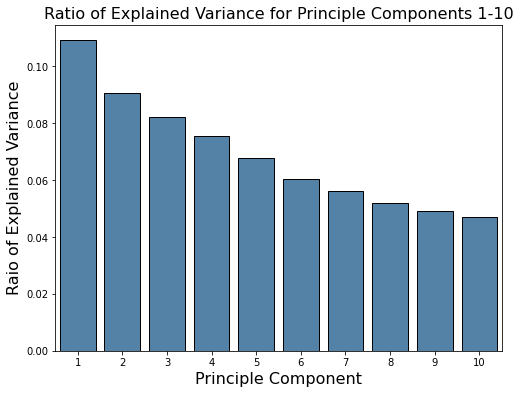

[0.10921433 0.09058806 0.08204935 0.07536511 0.06782025 0.06025971
 0.05604845 0.05210263 0.04916562 0.04699766]


In [47]:
pca_values, loadings = apply_pca(scaled_dp, 0, 1, components=10)

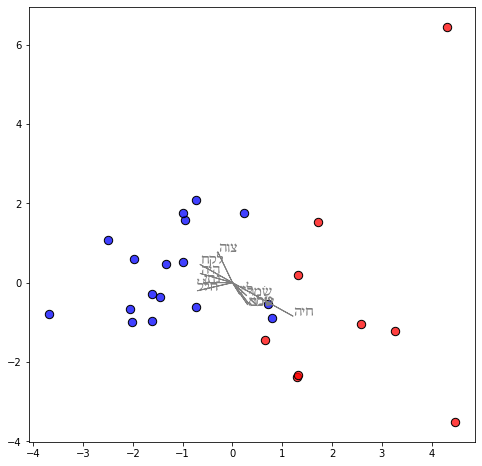

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))

s = 70

vals = pca_values.loc[idx[:,'duration'],:]
x, y = (vals.iloc[:,0], vals.iloc[:,1])
ax.scatter(x, y, facecolor=[(1, 0, 0, 0.75)], edgecolor='black', s=s)

vals = pca_values.loc[idx[:,'location'],:]
x, y = (vals.iloc[:,0], vals.iloc[:,1])
ax.scatter(x, y, facecolor=[(0, 0, 1, 0.75)], edgecolor='black', s=s)

skip_feat = ['ordinal', 'demonstrative']
offsets = {
#     'לין':
#         (-0.1, -0.2, 15),
#     'אמר':
#         (-0.34, -0.18, 15),
#     'שׁלח':
#         (-0.55, -0.1, 15),
#     'היה':
#         (-0.6, 0.01, 15),
#     'בוא':
#         (-0.55, 0.07, 15),
#     'לקח':
#         (-0.35, 0.04, 15),
#     'ידע':
#         (0.04, 0.04, 15),
}
top_loadings = loadings.abs().sum().sort_values(ascending=False).index[:10]
texts = []
for feature in top_loadings:
    x_off, y_off, size = offsets.get(feature, (0,0,15)) # config offsets / size
    fx, fy = loadings[feature][:2] * 2
    plt.arrow(0, 0, fx, fy, color='#808080', linewidth=1, head_width=0)
    show_text = get_display(feature) # handle bidirectional
    texts.append(plt.text(fx+x_off, fy+y_off, show_text, color='#808080', size=size, fontfamily='SBL Biblit'))
#adjust_text(texts)
    
out.plot('PCA_durVSloc_VERBLEX')

In [49]:
# df_sg.query(
#     '(lex_token == "עד.ה.ז׳") '
#     '& (quality == "duration")'
# )

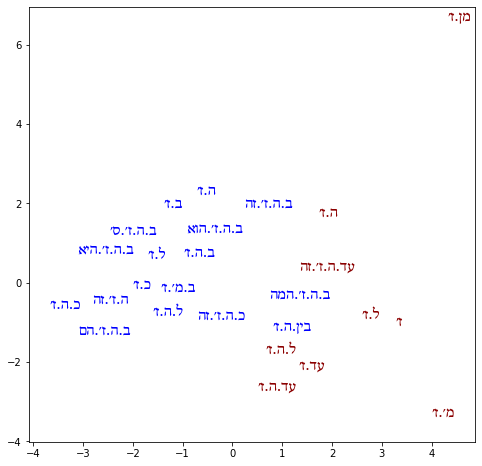

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))

s = 70
x, y = (pca_values.iloc[:,0], pca_values.iloc[:,1])
ax.scatter(x, y, facecolor=[], s=2)

texts = []
qual2col = {'location': 'blue', 'duration': 'darkred'}
for lex_tok, qual in pca_values.index:
    tx, ty = pca_values.loc[idx[lex_tok, qual]][:2]
    show_lex = get_display(lex_tok)
    texts.append(plt.text(tx, ty, show_lex, size=15, 
                          color=qual2col[qual], fontfamily='SBL Biblit'))
adjust_text(texts)
out.plot('PCA_durVSloc_VERBLEX_text')

In [51]:
pca_values.loc[idx['ב.ה.ז׳', 'location']]

PC1    -0.995362
PC2     0.514014
PC3     0.677879
PC4     0.122821
PC5    -1.952717
PC6     0.689927
PC7    -0.603724
PC8    -0.912992
PC9     0.231455
PC10    2.228855
Name: (ב.ה.ז׳, location), dtype: float64

In [52]:
pca_values

,,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
lex_token,quality,,,,,,,,,,
ב.ה.ז׳,location,-0.995362,0.514014,0.677879,0.122821,-1.952717,0.689927,-0.603724,-0.912992,0.231455,2.228855
ב.ה.ז׳.הוא,location,-0.947703,1.586415,-0.142452,-0.423023,0.313753,0.571022,-0.081610,-0.588768,-0.218675,0.484291
ב.ה.ז׳.היא,location,-1.969271,0.607141,1.448699,-1.108537,0.517816,-0.145428,0.932098,-0.130624,-0.947081,-1.785776
ב.ה.ז׳.הם,location,-2.022983,-0.986366,-2.902932,-0.939324,3.870243,-0.495412,-0.859290,-0.260626,3.108883,-0.220560
ב.ה.ז׳.המה,location,0.708792,-0.529342,-2.237438,3.768501,0.508254,-1.252146,-0.789868,-0.906531,-2.272041,-2.323026
ב.ה.ז׳.זה,location,0.225633,1.764998,4.123268,1.699678,-1.200191,0.324673,-1.037973,0.224874,3.130671,0.278629
ב.ה.ז׳.ס׳,location,-2.493356,1.084803,1.637686,0.025258,0.931806,1.984956,0.053223,-1.281541,-2.025586,0.513911
ב.ז׳,location,-0.987605,1.754638,0.675191,-0.036404,1.453638,0.762243,-0.240320,-1.153038,0.347291,1.172989
ב.מ׳.ז׳,location,-1.456937,-0.357053,2.474216,1.382290,0.700671,0.588338,0.234602,-0.226902,1.090685,-0.651540


In [53]:
pca_values.loc[idx[:, 'location'], :]

,,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
lex_token,quality,,,,,,,,,,
ב.ה.ז׳,location,-0.995362,0.514014,0.677879,0.122821,-1.952717,0.689927,-0.603724,-0.912992,0.231455,2.228855
ב.ה.ז׳.הוא,location,-0.947703,1.586415,-0.142452,-0.423023,0.313753,0.571022,-0.081610,-0.588768,-0.218675,0.484291
ב.ה.ז׳.היא,location,-1.969271,0.607141,1.448699,-1.108537,0.517816,-0.145428,0.932098,-0.130624,-0.947081,-1.785776
ב.ה.ז׳.הם,location,-2.022983,-0.986366,-2.902932,-0.939324,3.870243,-0.495412,-0.859290,-0.260626,3.108883,-0.220560
ב.ה.ז׳.המה,location,0.708792,-0.529342,-2.237438,3.768501,0.508254,-1.252146,-0.789868,-0.906531,-2.272041,-2.323026
ב.ה.ז׳.זה,location,0.225633,1.764998,4.123268,1.699678,-1.200191,0.324673,-1.037973,0.224874,3.130671,0.278629
ב.ה.ז׳.ס׳,location,-2.493356,1.084803,1.637686,0.025258,0.931806,1.984956,0.053223,-1.281541,-2.025586,0.513911
ב.ז׳,location,-0.987605,1.754638,0.675191,-0.036404,1.453638,0.762243,-0.240320,-1.153038,0.347291,1.172989
ב.מ׳.ז׳,location,-1.456937,-0.357053,2.474216,1.382290,0.700671,0.588338,0.234602,-0.226902,1.090685,-0.651540


In [54]:
pca_values.loc[idx[:, 'duration'], :]

,,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
lex_token,quality,,,,,,,,,,
ה.ז׳,duration,1.717730,1.536451,-2.227204,0.622682,0.816517,3.067769,-0.863034,0.311870,-2.167910,0.533320
ז׳,duration,3.266102,-1.227843,0.244860,-1.203667,0.923792,-0.436950,-0.567534,0.389131,-0.092533,0.278549
ל.ה.ז׳,duration,0.655573,-1.456736,-2.425132,1.357216,-2.418461,2.900099,5.188371,0.491953,2.009799,-0.729271
ל.ז׳,duration,2.581167,-1.030967,-0.334682,-3.058691,1.171811,-0.894075,1.767589,0.614498,-0.360650,0.794133
מן.ז׳,duration,4.309931,6.448970,-1.304801,-0.933619,0.102120,-0.393740,-0.267096,1.336108,0.929025,-0.682637
מ׳.ז׳,duration,4.472532,-3.511126,3.697225,1.071426,2.948029,0.436916,0.663409,0.097465,-0.170607,-0.007656
עד.ה.ז׳,duration,1.293521,-2.387286,-1.545148,-1.619225,-3.494638,0.615324,-3.008115,-3.052196,1.337847,-1.588093
עד.ה.ז׳.זה,duration,1.325651,0.182951,0.001592,-1.853606,-1.958921,-2.215202,-0.482692,1.147680,-0.098834,-0.044313
עד.ז׳,duration,1.313889,-2.321190,0.458766,-2.122865,-0.669238,0.856143,-0.642627,-0.755908,-1.266610,0.035717


In [55]:
df_sg.query("(lex_token == 'ב.מ׳.ז׳') & (quality == 'duration')")

,book,verse,function,quality,name,text,time_lexs,n_times,lex_token,is_advb,cl_kind,clause,sentence,verb,verbform,verb_etcbc,verb_txt
node,,,,,,,,,,,,,,,,,


# Tense

In [56]:
verbf_ct = pd.pivot_table(
    df_sg[df_sg.lex_token.isin(token_ct.index)],
    index=['lex_token', 'quality'],
    columns=['verbform'],
    aggfunc='size',
    fill_value=0
)

verbf_ct = verbf_ct.loc[idx[:, ['location', 'duration']], :]
verbf_ct = verbf_ct[['qtl', 'wayq', 'yqtl', 'wqtl']]

verbf_ct

,verbform,qtl,wayq,yqtl,wqtl
lex_token,quality,,,,
ב.ה.ז׳,location,19,64,44,21
ב.ה.ז׳.הוא,location,24,77,56,54
ב.ה.ז׳.היא,location,17,26,11,1
ב.ה.ז׳.הם,location,10,4,5,0
ב.ה.ז׳.המה,location,1,0,3,1
ב.ה.ז׳.זה,location,6,4,7,4
ב.ה.ז׳.ס׳,location,18,44,35,15
ב.ז׳,location,76,12,79,16
ב.מ׳.ז׳,location,35,23,3,2


In [57]:
# drop verbs that only occur once
verbf_ct_ = verbf_ct.drop(
        columns=verbf_ct.columns[verbf_ct.sum() < 10]
    )

# re-filter rare tokens
verbf_ct_ = verbf_ct_.drop(
    index=verbf_ct_.index[verbf_ct_.sum(1) < 2]
)

In [58]:
verbf_ct_.shape

(28, 4)

In [59]:
verbf_ct_

,verbform,qtl,wayq,yqtl,wqtl
lex_token,quality,,,,
ב.ה.ז׳,location,19,64,44,21
ב.ה.ז׳.הוא,location,24,77,56,54
ב.ה.ז׳.היא,location,17,26,11,1
ב.ה.ז׳.הם,location,10,4,5,0
ב.ה.ז׳.המה,location,1,0,3,1
ב.ה.ז׳.זה,location,6,4,7,4
ב.ה.ז׳.ס׳,location,18,44,35,15
ב.ז׳,location,76,12,79,16
ב.מ׳.ז׳,location,35,23,3,2


## PCA Analysis with Tense

In [60]:
verbf_dp = sig.apply_deltaP(verbf_ct_, 0, 1)
verbf_dp = verbf_dp.dropna()
verbf_dp.head()

,verbform,qtl,wayq,yqtl,wqtl
lex_token,quality,,,,
ב.ה.ז׳,location,-0.156055,0.181952,-0.049275,0.023378
ב.ה.ז׳.הוא,location,-0.179313,0.112592,-0.087735,0.154456
ב.ה.ז׳.היא,location,0.039442,0.213356,-0.147037,-0.105760
ב.ה.ז׳.הם,location,0.258268,-0.056338,-0.080037,-0.121893
ב.ה.ז׳.המה,location,-0.071127,-0.267019,0.258451,0.079695


In [61]:
# scale the features
scaler3 = StandardScaler()
scaler3.fit(verbf_dp)
scaled_dp_raw = scaler3.transform(verbf_dp) # scale the raw counts
scaled_dp2 = pd.DataFrame(scaled_dp_raw, index=verbf_dp.index, columns=verbf_dp.columns)
scaled_dp2.head()

,verbform,qtl,wayq,yqtl,wqtl
lex_token,quality,,,,
ב.ה.ז׳,location,-0.885652,1.100591,-0.269326,0.477157
ב.ה.ז׳.הוא,location,-0.989320,0.745977,-0.428311,1.764425
ב.ה.ז׳.היא,location,-0.014288,1.261151,-0.673461,-0.791066
ב.ה.ז׳.הם,location,0.961065,-0.117712,-0.396492,-0.949507
ב.ה.ז׳.המה,location,-0.507112,-1.194862,1.002770,1.030225


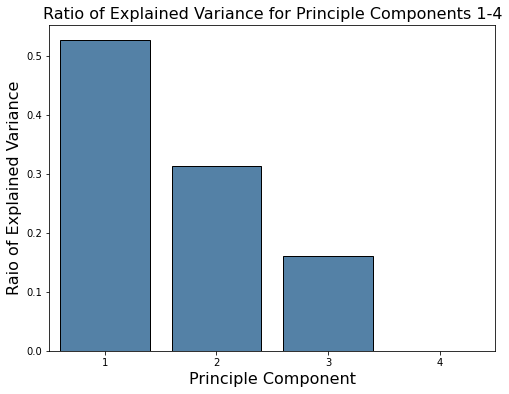

[5.26222296e-01 3.13496236e-01 1.60281468e-01 2.80204025e-32]


In [62]:
pca_values2, loadings2 = apply_pca(scaled_dp2, 0, 1, components=4)

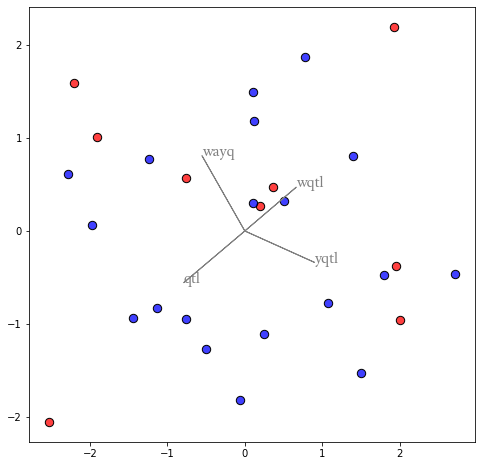

In [66]:
fig, ax = plt.subplots(figsize=(8, 8))

s = 70

vals = pca_values2.loc[idx[:,'duration'],:]
x, y = (vals.iloc[:,0], vals.iloc[:,1])
ax.scatter(x, y, facecolor=[(1, 0, 0, 0.75)], edgecolor='black', s=s)

vals = pca_values2.loc[idx[:,'location'],:]
x, y = (vals.iloc[:,0], vals.iloc[:,1])
ax.scatter(x, y, facecolor=[(0, 0, 1, 0.75)], edgecolor='black', s=s)

skip_feat = ['ordinal', 'demonstrative']
offsets = {
}
top_loadings2 = loadings2.abs().sum().sort_values(ascending=False).index[:10]
texts = []
for feature in top_loadings2:
    x_off, y_off, size = offsets.get(feature, (0,0,15)) # config offsets / size
    fx, fy = loadings2[feature][:2]
    plt.arrow(0, 0, fx, fy, color='#808080', linewidth=1, head_width=0)
    show_text = get_display(feature) # handle bidirectional
    texts.append(plt.text(fx+x_off, fy+y_off, show_text, color='#808080', size=size, fontfamily='SBL Biblit'))
#adjust_text(texts)
    
out.plot('PCA_durVSloc_TENSE')

In [64]:
# df_sg.query(
#     '(lex_token == "עד.ה.ז׳") '
#     '& (quality == "duration")'
# )

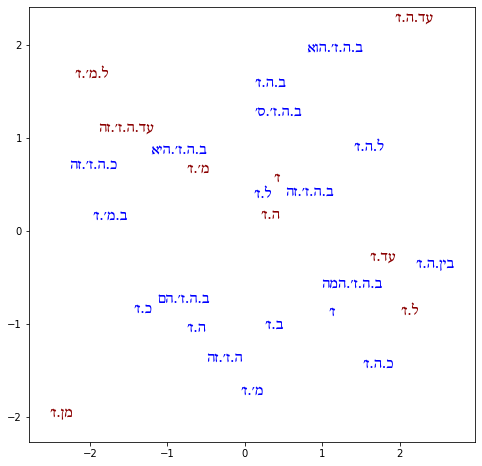

In [65]:
fig, ax = plt.subplots(figsize=(8, 8))

s = 70
x, y = (pca_values2.iloc[:,0], pca_values2.iloc[:,1])
ax.scatter(x, y, facecolor=[], s=2)

texts = []
qual2col = {'location': 'blue', 'duration': 'darkred'}
for lex_tok, qual in pca_values2.index:
    tx, ty = pca_values2.loc[idx[lex_tok, qual]][:2]
    show_lex = get_display(lex_tok)
    texts.append(plt.text(tx, ty, show_lex, size=15, 
                          color=qual2col[qual], fontfamily='SBL Biblit'))
adjust_text(texts)
out.plot('PCA_durVSloc_TENSE_text')